In [1]:
# importar paquetes importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

C:\Users\garro\AppData\Local\Temp\ipykernel_19836\4032630433.py:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
#IMPORTAMOS BASE DE DATOS 1
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

#CAMBIAMOS FORMATO DE LA COLUMNA FECHA A 'DATETIME'
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')

#LIMPIEZA DE VALORES NULOS. REEMPLAZO POR MEDIA
bd['EDAD']= bd['EDAD'].fillna(method='bfill')

#REMOCION DE OUTLIERS
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[column_name]>=lower_bound) & (df[column_name] <= upper_bound)]
    return df
bd = remove_outliers(bd, 'EDAD')
bd.head(10)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VIOLENCIA_INSTITUCIONAL,VIOLENCIA_LABORAL,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ex pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ex pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Pareja,Varon,1.0,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
5,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Ex pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA
6,2020-01-01,Santiago Del Estero,Mujer,25.0,Paraguaya,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA
7,2020-01-01,Santa Fe,Mujer,24.0,Argentina,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ex pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
8,2020-01-01,Santa Fe,Mujer,21.0,Argentina,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA
9,2020-01-01,San Juan,Mujer,21.0,Argentina,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Pareja,Varon,1.0,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA


In [3]:
# mostrar columnas
bd.columns

Index(['FECHA', 'PROVINCIA', 'GENERO_PERSONA_SIT_VIOLENCIA', 'EDAD',
       'PAIS_NACIMIENTO', 'VIOLENCIA_FISICA', 'VIOLENCIA_PSICOLOGICA',
       'VIOLENCIA_SEXUAL', 'VIOLENCIA_ECONOMICA', 'VIOLENCIA_SIMBOLICA',
       'VIOLENCIA_DOMESTICA', 'VIOLENCIA_INSTITUCIONAL', 'VIOLENCIA_LABORAL',
       'VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'VIOLENCIA_OTRAS',
       'VINCULO_PERSONA_AGRESORA', 'GENERO_AGRESOR', 'CASO', 'TiPO_VIOLENCIA',
       'LUGAR_VIOLENCIA', 'MOTIVO_VIOLENCIA'],
      dtype='object')

In [4]:
# Paso 2: Dividir los datos en características (X) y variable objetivo (y)
X=bd.drop(['FECHA','VIOLENCIA_FISICA', 'VIOLENCIA_PSICOLOGICA',
       'VIOLENCIA_SEXUAL', 'VIOLENCIA_ECONOMICA', 'VIOLENCIA_SIMBOLICA',
       'VIOLENCIA_DOMESTICA', 'VIOLENCIA_INSTITUCIONAL', 'VIOLENCIA_LABORAL',
       'VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'VIOLENCIA_OTRAS','TiPO_VIOLENCIA'], axis=1)
y=bd['TiPO_VIOLENCIA']


In [5]:
# Paso 3: Convertir variables categóricas en variables dummy (one-hot encoding)
X = pd.get_dummies(X)

In [6]:
# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Paso 5: Crear el modelo de Random Forest
model = RandomForestClassifier()

# Paso 6: Entrenar el modelo
model.fit(X_train, y_train)

# Paso 7: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 8: Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 68.00%


In [7]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

                       precision    recall  f1-score   support

     VIOLENCIA_FISICA       0.72      0.87      0.78      4811
VIOLENCIA_PSICOLOGICA       0.52      0.30      0.38      2339

             accuracy                           0.68      7150
            macro avg       0.62      0.58      0.58      7150
         weighted avg       0.65      0.68      0.65      7150



In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

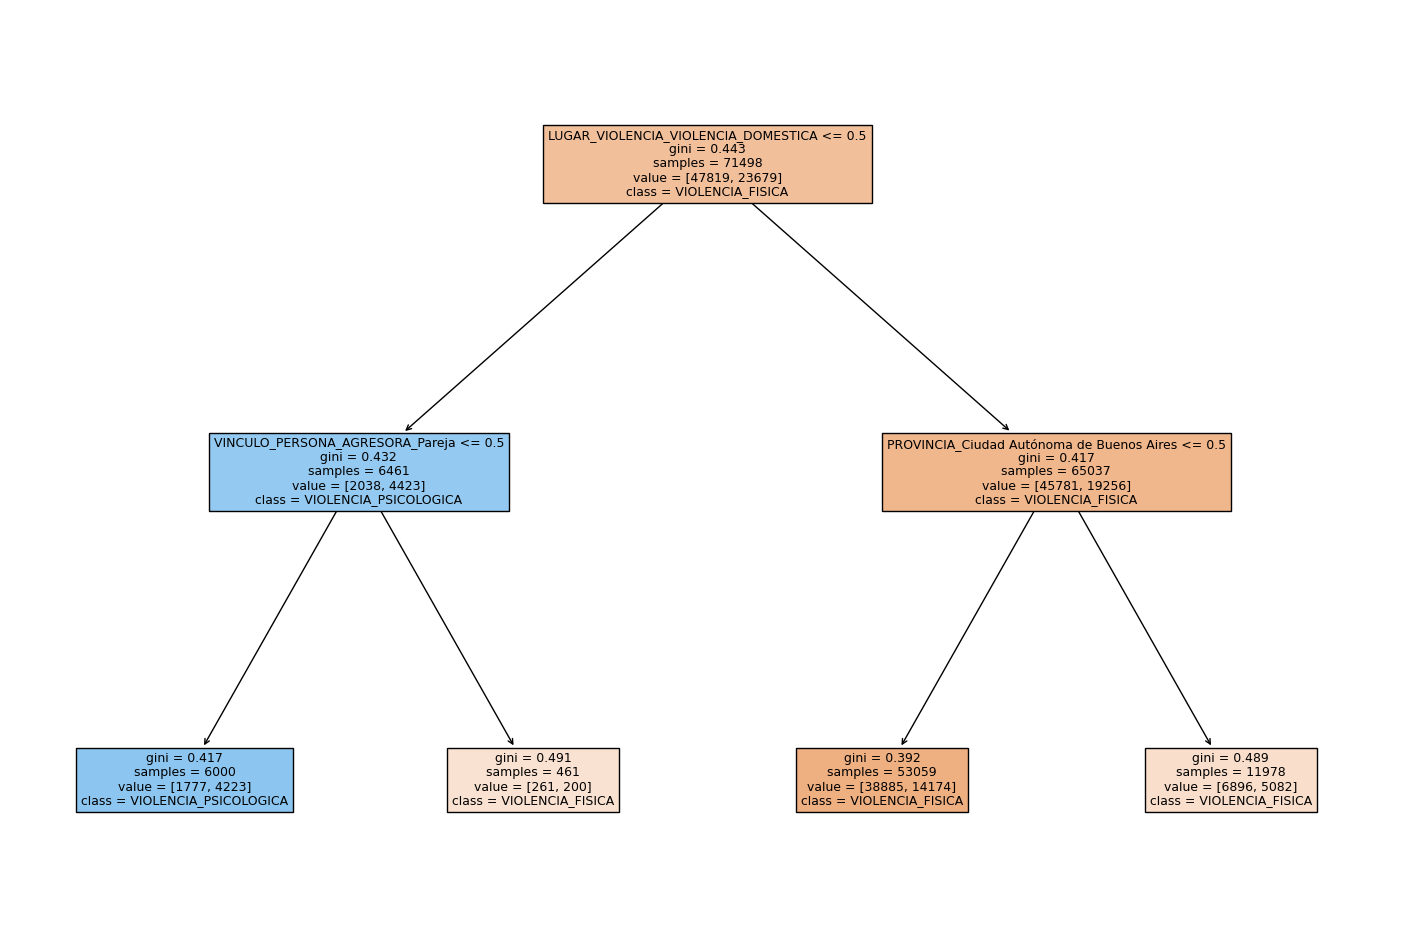

In [9]:
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=1234, max_depth=2)
model = clf.fit(X, y)
# Graficando
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf,feature_names=X.columns,  
                   class_names=y.unique().astype('str'),
                   filled=True)